In the previous tutorial we introduced Tensors and operations on them. In this tutorial we will cover automatic differentiation, a key technique for optimizing machine learning models.

In [1]:
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
x = tf.zeros([10, 10])
x += 2  
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [3]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

# Re-assign the value
v.assign(3.0)
assert v.numpy() == 3.0

# Use `v` in a TensorFlow operation like tf.square() and reassign
v.assign(tf.square(v))
assert v.numpy() == 9.0

In [4]:
class Model(object):
    def __init__(self):
        # Initialize variable to (5.0, 0.0)
        # In practice, these should be initialized to random values.
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    
    def __call__(self, x):
        return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 15.0

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
def loss(y_predicted,y_desired):
    return tf.reduce_mean(tf.square(y_predicted-y_desired))

In [6]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random_normal(shape=[NUM_EXAMPLES])
noise   = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

Before we train the model let's visualize where the model stands right now. We'll plot the model's predictions in red and the training data in blue.

In [7]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

<Figure size 640x480 with 1 Axes>

Current loss: 
8.335015


**Computing gradient:**

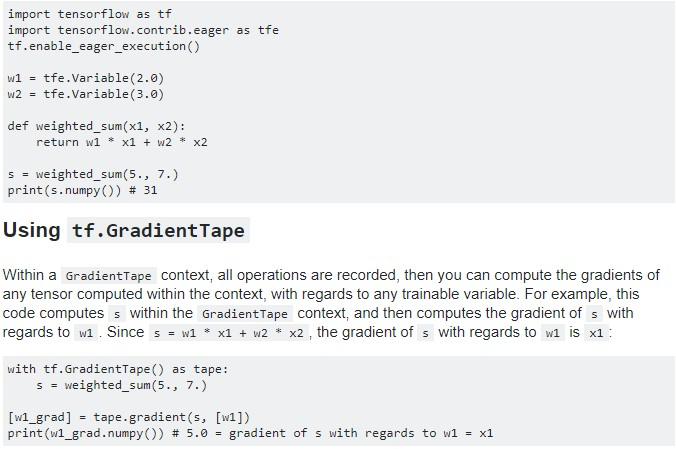

In [8]:
def train(model,inputs,outputs,learning_rate):
    with tf.GradientTape() as t:
        c_loss=loss(model(inputs),outputs)
    [dW,db]=t.gradient(c_loss,[model.W,model.b])
    model.W.assign_sub(learning_rate*dW)
    model.b.assign_sub(learning_rate*db)

Epoch  0: W=5.00 b=0.00, loss=8.33502
Epoch  1: W=4.62 b=0.37, loss=5.78955
Epoch  2: W=4.31 b=0.67, loss=4.12105
Epoch  3: W=4.06 b=0.91, loss=3.02736
Epoch  4: W=3.86 b=1.11, loss=2.31047
Epoch  5: W=3.70 b=1.26, loss=1.84056
Epoch  6: W=3.56 b=1.39, loss=1.53253
Epoch  7: W=3.46 b=1.50, loss=1.33062
Epoch  8: W=3.37 b=1.58, loss=1.19827
Epoch  9: W=3.30 b=1.65, loss=1.11152


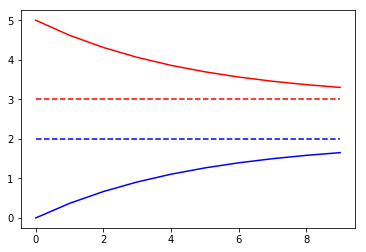

In [9]:
model=Model()
Ws,bs=[],[]
epochs=range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    c_loss=loss(model(inputs),outputs)
    train(model,inputs,outputs,0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], c_loss))
    
plt.plot(epochs,Ws,c='r');
plt.plot(epochs,bs,c='b');
plt.plot(epochs,[TRUE_W]*len(epochs),'--',c='r');
plt.plot(epochs,[TRUE_b]*len(epochs),'--',c='b');
plt.show()